# Logistic regression: probability, odds, and log-odds
1. Problem with a linear probability model: fitting a straight line for the probability `p(X) = P(Y=1 | X)` can predict values outside `[0, 1]`, which is not valid for probabilities.

2. Logistic function: to constrain predictions to `[0,1]` use the logistic (sigmoid) function. The model maps a linear predictor `t` (also called log-odds) to probability `p` via
`p = 1 / (1 + exp(-t))`.

# What to visualize

- Plot `p = sigmoid(t)` to see how a real-valued linear predictor `t` is squashed into `[0,1]`.
- Plot `odds = p / (1-p)` and `log-odds = log(odds)` to see their relation to `p` (and why log-odds are unbounded).

In [ ]:
# python
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

# linear predictor range
t = np.linspace(-10, 10, 1000)
p = sigmoid(t)

# avoid p exactly 0 or 1 for odds computation
p_safe = np.clip(p, 1e-6, 1 - 1e-6)
odds = p_safe / (1 - p_safe)
log_odds = np.log(odds)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: probability vs linear predictor
ax = axes[0]
ax.plot(t, p, color='tab:blue', lw=2)
ax.axvline(0, color='gray', lw=1, ls='--')
ax.axhline(0.5, color='gray', lw=1, ls='--')
ax.set_xlabel('linear predictor `t`')
ax.set_ylabel('probability `p = sigmoid(t)`')
ax.set_title('Sigmoid: linear predictor -> probability')
ax.grid(alpha=0.3)

# Right: odds and log-odds vs probability
ax = axes[1]
# plot odds on a log scale to show huge dynamic range
ax.plot(p, odds, color='tab:orange', lw=2, label='odds = p/(1-p)')
ax.set_yscale('log')
ax.set_xlabel('probability `p`')
ax.set_ylabel('odds (log scale)')
ax.set_title('Odds and log-odds as functions of probability')
ax.grid(alpha=0.3)

# overlay log-odds on a secondary axis (linear scale)
ax2 = ax.twinx()
ax2.plot(p, log_odds, color='tab:green', lw=2, label='log-odds = log(p/(1-p))')
ax2.set_ylabel('log-odds (logit)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# legends
ax.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

### The graph shows how probability, odds, and log-odds (logit) behave as the probability  𝑝 increases from 0 to 1.

* Probability (p) increases linearly from 0 to 1.
* Odds = p / (1 − p)
  - Starts near 0
  - Explodes to infinity as 𝑝 → 1
* Log-odds = log(p / (1 − p))
  - Is negative when 𝑝 < 0.
  - Zero when 𝑝 = 0.5
  - Positive when 𝑝 > 0.5
  - Grows slowly and symmetrically across the real line

It transforms the bounded probability scale [0,1] into an unbounded linear scale (−∞,+∞).

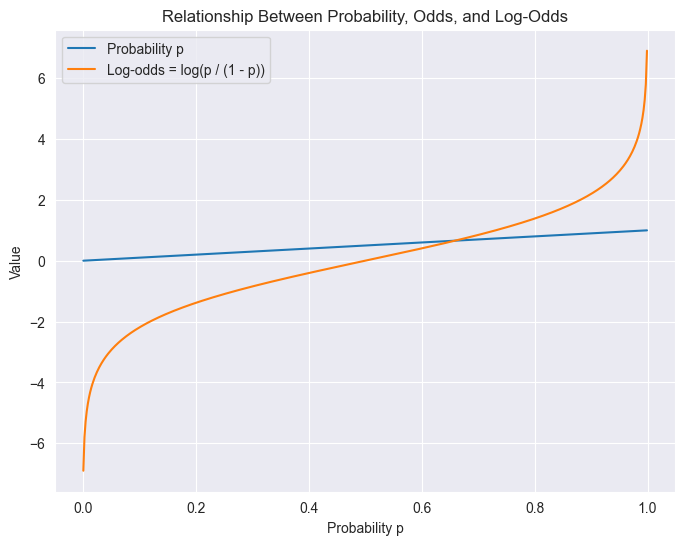

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate probability values between 0 and 1
p = np.linspace(0.001, 0.999, 500)

# Compute odds and log-odds
#odds = p / (1 - p)
log_odds = np.log(odds)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(p, p, label="Probability p")
#plt.plot(p, odds, label="Odds = p / (1 - p)")
plt.plot(p, log_odds, label="Log-odds = log(p / (1 - p))")

plt.xlabel("Probability p")
plt.ylabel("Value")
#plt.title("Relationship Between Probability, Odds, and Log-Odds")
plt.title("Relationship Between Probability, Odds, and Log-Odds")
plt.legend()
plt.grid(True)

plt.show()


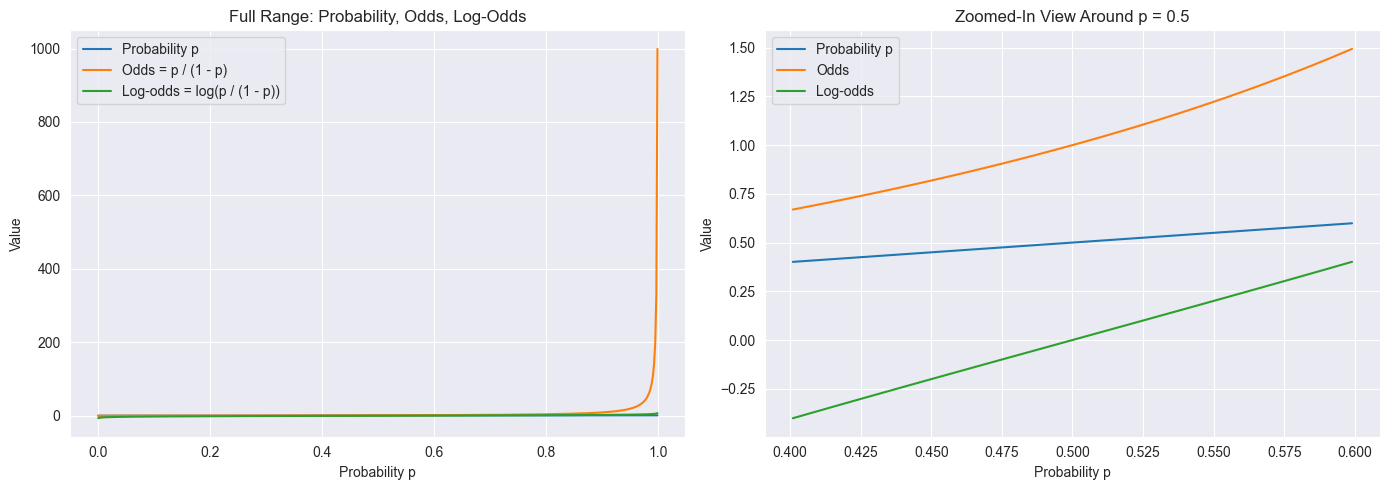

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate probability values
p = np.linspace(0.001, 0.999, 500)

# Compute odds and log-odds
odds = p / (1 - p)
log_odds = np.log(odds)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Full range plot ---
axes[0].plot(p, p, label="Probability p")
axes[0].plot(p, odds, label="Odds = p / (1 - p)")
axes[0].plot(p, log_odds, label="Log-odds = log(p / (1 - p))")

axes[0].set_title("Full Range: Probability, Odds, Log-Odds")
axes[0].set_xlabel("Probability p")
axes[0].set_ylabel("Value")
axes[0].legend()
axes[0].grid(True)

# --- Zoomed-in plot around p = 0.5 ---
zoom_min, zoom_max = 0.4, 0.6
mask = (p >= zoom_min) & (p <= zoom_max)

axes[1].plot(p[mask], p[mask], label="Probability p")
axes[1].plot(p[mask], odds[mask], label="Odds")
axes[1].plot(p[mask], log_odds[mask], label="Log-odds")

axes[1].set_title("Zoomed-In View Around p = 0.5")
axes[1].set_xlabel("Probability p")
axes[1].set_ylabel("Value")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
